# 제 5회 빅콘테스 챌린지리그

- 문제 : 보험, 통신, 신용평가사 (개인정보 비식별)결합데이터를 활용한 대출상환 예측 알고리즘 개발
- 제공데이터 및 내용 : 개인정보 비식별화 한 SK텔레콤 데이터등 , 개인정보 비식별화 한 SCI평가정보 및 한화생명 데이터 등
- 참가대상 : 대학생 이상 일반인포함 
- http://contest.kbig.kr/sub/sub_question.php

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import cufflinks as cf
cf.go_offline()

%matplotlib inline

# Data

![data](https://files.slack.com/files-tmb/T5AP56SQ3-F6KH2CRUG-10cc1c9afd/_______________________________2017-08-09______________9.10.59_1024.png)

![data](https://files.slack.com/files-tmb/T5AP56SQ3-F6KH2DK6U-4852329394/_______________________________2017-08-09______________9.11.38_1024.png)

![data컬럼설명](https://files.slack.com/files-tmb/T5AP56SQ3-F6L6VB5LJ-5e28475264/_______________________________2017-08-09______________9.11.58_1024.png)

In [117]:
train = pd.read_csv('Data_set.csv', encoding='cp949')

In [118]:
train.tail()

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
100228   102248       0             1             0               2   
100229   102249       0             2             0               0   
100230   102250       0             1             0               0   
100231   102251       0             0             0               1   
100232   102252       0             1             0               0   

        ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228             2         75001         15001         57001             0   
100229             0         54001          9001         54001             0   
100230             0         27001         27001         27001             0   
100231             1         57001             0             0             0   
100232             0         18001         18001         18001             0   

          ...      CBPT_MBSP_YN  MOBL_FATY_PRC  TEL_CNTT_QTR  NUM_DAY_SUSP  \
100228    ...                 N              0         20111             0   
100229    ...                 Y         900000         20134             0   
100230    ...                 N              0         20141             0   
100231    ...                 N         900000         20103             0   
100232    ...                 N         400000         20151             0   

        CRMM_OVDU_AMT  TLFE_UNPD_CNT LT1Y_MXOD_AMT  PAYM_METD  LINE_STUS  \
100228          20000              0             0          R          U   
100229              0              0             0          K          U   
100230              0              0             0          O          U   
100231              0              0             0          O          U   
100232              0              0         60000          K          U   

        MOBL_PRIN  
100228          0  
100229     180000  
100230          0  
100231     540000  
100232     180000  

[5 rows x 69 columns]

In [119]:
train.shape

(100233, 69)

In [120]:
grouped = train['TARGET'].value_counts()
grouped

0    95946
1     4287
Name: TARGET, dtype: int64

## 1 . 변수 탐색
. train 데이터로 주어진 고객 수 :100233명

1) y값 : 대출연체 여부
      - 0 (미발생): 95946명
      - 1 (발생) : 4287명

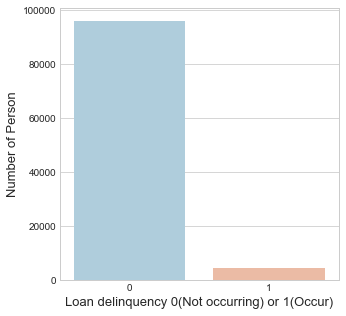

In [121]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(grouped.index, grouped.values, palette='RdBu_r')
plt.ylabel('Number of Person', fontsize=13)
plt.xlabel('Loan delinquency 0(Not occurring) or 1(Occur)', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

2) x 값 : 68 개 컬럼                                                                                                                  

In [122]:
train_1 = train.copy()

In [123]:
del train_1['TARGET']

In [124]:
train_1.tail()

CUST_ID  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT  \
100228   102248             1             0               2             2   
100229   102249             2             0               0             0   
100230   102250             1             0               0             0   
100231   102251             0             0               1             1   
100232   102252             1             0               0             0   

        TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228         75001         15001         57001             0   
100229         54001          9001         54001             0   
100230         27001         27001         27001             0   
100231         57001             0             0             0   
100232         18001         18001         18001             0   

        CRDT_OCCR_MDIF    ...      CBPT_MBSP_YN  MOBL_FATY_PRC  TEL_CNTT_QTR  \
100228              37    ...                 N              0         20111   
100229              85    ...                 Y         900000         20134   
100230               1    ...                 N              0         20141   
100231               1    ...                 N         900000         20103   
100232              49    ...                 N         400000         20151   

        NUM_DAY_SUSP  CRMM_OVDU_AMT TLFE_UNPD_CNT  LT1Y_MXOD_AMT  PAYM_METD  \
100228             0          20000             0              0          R   
100229             0              0             0              0          K   
100230             0              0             0              0          O   
100231             0              0             0              0          O   
100232             0              0             0          60000          K   

        LINE_STUS  MOBL_PRIN  
100228          U          0  
100229          U     180000  
100230          U          0  
100231          U     540000  
100232          U     180000  

[5 rows x 68 columns]

In [125]:
train_X = train_1.copy()
del train_1

In [126]:
list_x = list(train_X.columns)

## (1) null 값 처리
    -OCCP_NAME_G
    -LAST_CHLD_AGE       
    -MATE_OCCP_NAME_G
    -TEL_MBSP_GRAD
    -PAYM_METD

In [161]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100233 entries, 0 to 100232
Data columns (total 68 columns):
CUST_ID              100233 non-null int64
BNK_LNIF_CNT         100233 non-null int64
CPT_LNIF_CNT         100233 non-null int64
SPART_LNIF_CNT       100233 non-null int64
ECT_LNIF_CNT         100233 non-null int64
TOT_LNIF_AMT         100233 non-null int64
TOT_CLIF_AMT         100233 non-null int64
BNK_LNIF_AMT         100233 non-null int64
CPT_LNIF_AMT         100233 non-null int64
CRDT_OCCR_MDIF       100233 non-null int64
SPTCT_OCCR_MDIF      100233 non-null int64
CRDT_CARD_CNT        100233 non-null int64
CTCD_OCCR_MDIF       100233 non-null int64
CB_GUIF_CNT          100233 non-null int64
CB_GUIF_AMT          100233 non-null int64
OCCP_NAME_G          100233 non-null object
CUST_JOB_INCM        100233 non-null int64
HSHD_INFR_INCM       100233 non-null int64
ACTL_FMLY_NUM        100233 non-null int64
CUST_FMLY_NUM        100233 non-null int64
LAST_CHLD_AGE        100233 

In [128]:
# 직업 
len(train_X[lambda x: x.OCCP_NAME_G.isnull()])

464

In [129]:
# 배우자 직업
len(train_X[lambda x: x.MATE_OCCP_NAME_G.isnull()]) 

45709

In [130]:
# 막내 자녀 나이 (0 = NULL)
len(train_X[lambda x: x.LAST_CHLD_AGE.isnull()])

1027

In [131]:
# SKT 멤버쉽 등급
len(train_X[lambda x: x.TEL_MBSP_GRAD.isnull()]) 

46015

In [132]:
# 납부 방법 
len(train_X[lambda x: x.PAYM_METD.isnull()]) 

2833

#### 1) 'LAST_CHLD_AGE' 막내 자녀 나이는 nan 값과  0값이 같은 데이터 이므로 0으로 nan 값을 채워 준다

In [133]:
train_X['LAST_CHLD_AGE'].fillna(0, inplace=True)

In [134]:
len(train_X[lambda x: x.LAST_CHLD_AGE.isnull()])

0

#### 2) 'OCCP_NAME_G' 직업은 nan 값과 * 비식별 데이터가 문제가 됨. labelencoding을 해야 하므로  다른 값으로 채워준다.
- labelencoding 시  nan 값들이 0을 가질 수 있도록 string '0'으로 채운다.


In [135]:
len(train_X[lambda x: x.OCCP_NAME_G.isnull()])

464

In [136]:
train_X['OCCP_NAME_G'].fillna('0', inplace=True)

In [137]:
len(train_X[lambda x: x.OCCP_NAME_G.isnull()])

0

#### 3) 'MATE_OCCP_NAME_G' 배우자 직업은 nan 값과 * 비식별 데이터가 문제가 됨. labelencoding을 해야 하므로  다른 값으로 채워준다.
- labelencoding 시  nan 값들이 0을 가질 수 있도록 string '0'으로 채운다.
- 그러나, OCCP_NAME_G와 달리 null 값이 너무 많음. 사용할지 말지 고민...
- 배우자가 없거나, 배우자가 직업이 없을 경우 nan 인듯

In [138]:
len(train_X[lambda x: x.MATE_OCCP_NAME_G.isnull()])

45709

In [139]:
train_X['MATE_OCCP_NAME_G'].fillna('0', inplace=True)

In [140]:
len(train_X[lambda x: x.MATE_OCCP_NAME_G.isnull()])

0

#### 4) 'TEL_MBSP_GRAD'  멤버쉽 등급 nan 은 멤버쉽 등급 정보가 없음
- 2g폰 사용자라도 멤버쉽 등급은 있는데... 왜 nan 값일까...
- MATE_OCCP_NAME_G와 마찬가지로 null 값이 너무 많음. 사용할지 말지 고민...

In [141]:
len(train_X[lambda x: x.TEL_MBSP_GRAD.isnull()]) 

46015

In [142]:
train_X['TEL_MBSP_GRAD'].fillna('0', inplace=True)

In [143]:
len(train_X[lambda x: x.TEL_MBSP_GRAD.isnull()]) 

0

#### 5) 'PAYM_METD' 납부 방법 
- 납부방법 nan 값은 0으로 처리

In [144]:
len(train_X[lambda x: x.PAYM_METD.isnull()]) 

2833

In [145]:
train_X['PAYM_METD'].fillna('0', inplace=True)

In [146]:
len(train_X[lambda x: x.PAYM_METD.isnull()]) 

0

## (2) 질적 변수 , 양적 변수 
- (Scatter Plot) 그리기

In [147]:
def variable(var_x):
    (train.iplot(kind='scatter', mode='markers', y=var_x,subplots=True))

### 1) list_x [0:10] 

1) 양적변수

  - 'CUST_ID'(고객_ID), 
  - 'BNK_LNIF_CNT'(대출 정보 현재 총 건수[은행]) ,
  - 'CPT_LNIF_CNT'(대출 정보 현재 총 건수[카드사/할부사/캐피탈])
  - 'SPART_LNIF_CNT'(대출 정보 현재 총 건수 [2차산업분류]),
  - 'ECT_LNIF_CNT'(대출정보 현재 총 건수[기타]),
  - 'TOT_LNIF_AMT'(대출정보 현재 총 금액),
  - 'TOT_CLIF_AMT'(대출정보 현재 총 금액[신용대출]),
  - 'BNK_LNIF_AMT'(대출정보 현재 총 금액[은행]),
  - 'CPT_LNIF_AMT'(대출정보 현재 총 금액[카드사/할부사/캐피탈]),
  - 'CRDT_OCCR_MDIF'(대출정보 최근 개설일로부터 현재까지 유지기간[신용대출])

In [148]:
def scatter_plot(start,end):
    with plt.style.context(('seaborn-white')):
        sns_plot = sns.pairplot(train_X[list_x[start:end]] ,size=1.5
                               )
    plt.show()

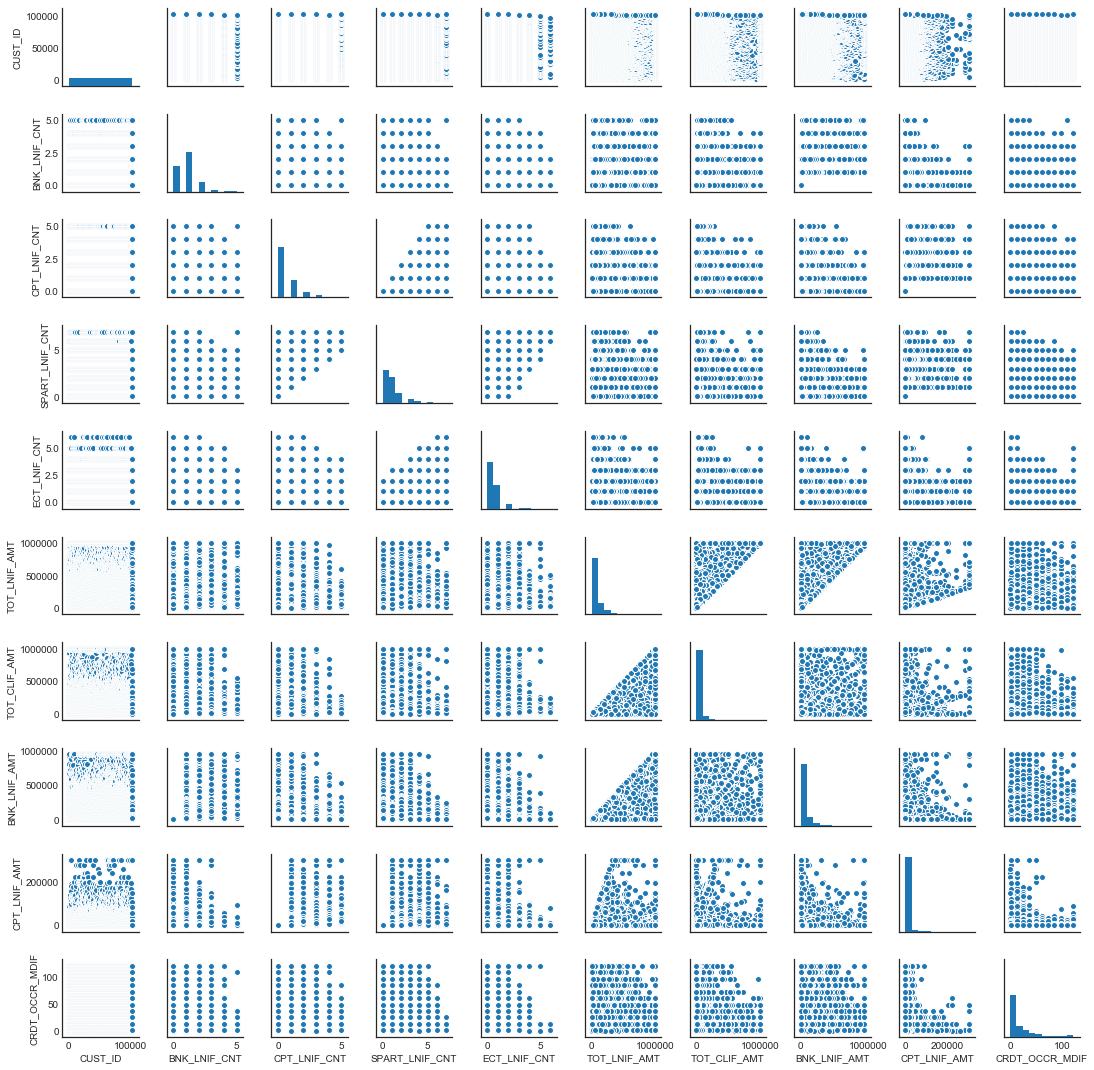

In [149]:
scatter_plot(0,10)

### 2) list_x [10:20] 

1) 양적변수
    
    -'SPTCT_OCCR_MDIF'(대출정보 최근 개설일로부터 현재까지 유지기간[2산업분류-신용대출]),
    -'CRDT_CARD_CNT'(개설정보 현재 신용개설 총 건수[신용카드]),
    -'CTCD_OCCR_MDIF'(개설정보 최초 개설일로부터 현재까지 유지기간[신용카드]),
    -'CB_GUIF_CNT'(보증정보 현재 보증 총 건수),
    -'CB_GUIF_AMT'(보증정보 현재 보증 총 금액),
    -'CUST_JOB_INCM'(추정소득),
    -'HSHD_INFR_INCM'(가구추정소득),
    -'ACTL_FMLY_NUM'(실가족원수),
    -'CUST_FMLY_NUM'(보험가입가족원수)

2) 질적변수

    -'OCCP_NAME_G'(직업)

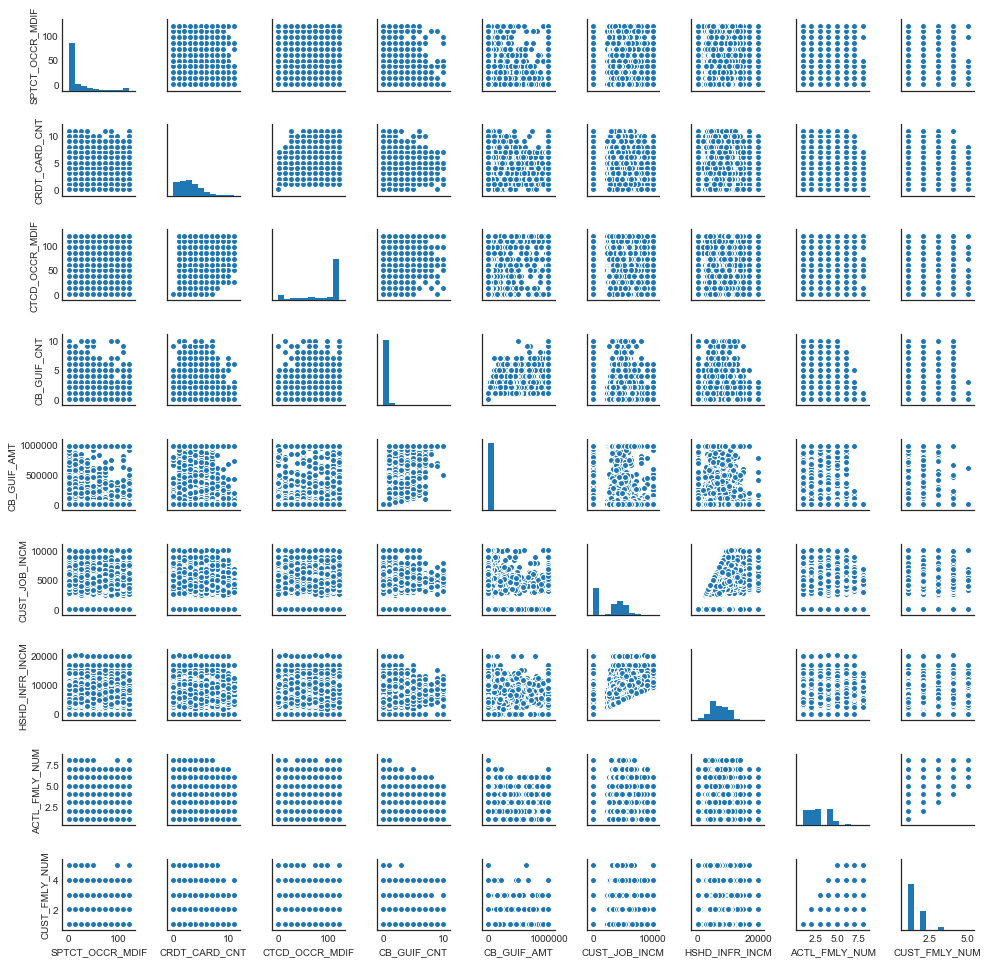

In [17]:
scatter_plot(10,20)

In [150]:
def bar_chart(x_val, title):
    x_bar = train_X[x_val].value_counts()
    x_bar.iplot(kind='bar',title=title)  

In [151]:
#NULL, *(비식별처리)
bar_chart('OCCP_NAME_G','산출일 기준 대분류 직업 정보')

### 3) list_x [20:30] 

1) 양적변수
    
    -'MATE_JOB_INCM' (배우자추정소득)
    -'CRDT_LOAN_CNT'(신용대출건수),
    -'TOT_CRLN_AMT'(한화생명신용대출금액),
    -'TOT_REPY_AMT'(한화생명신용상환금액),
    -'CRLN_OVDU_RATE'(신용대출연체율),
    -'CRLN_30OVDU_RATE'(30일이내신용대출연체율),
    -'LT1Y_CLOD_RATE'(최근1년신용대출연체율)

2) 질적변수

    -'LAST_CHLD_AGE'(막내자녀나이),
    -'MATE_OCCP_NAME_G'(배우자직업),
    -'MIN_CNTT_DATE'(최초대출날짜),

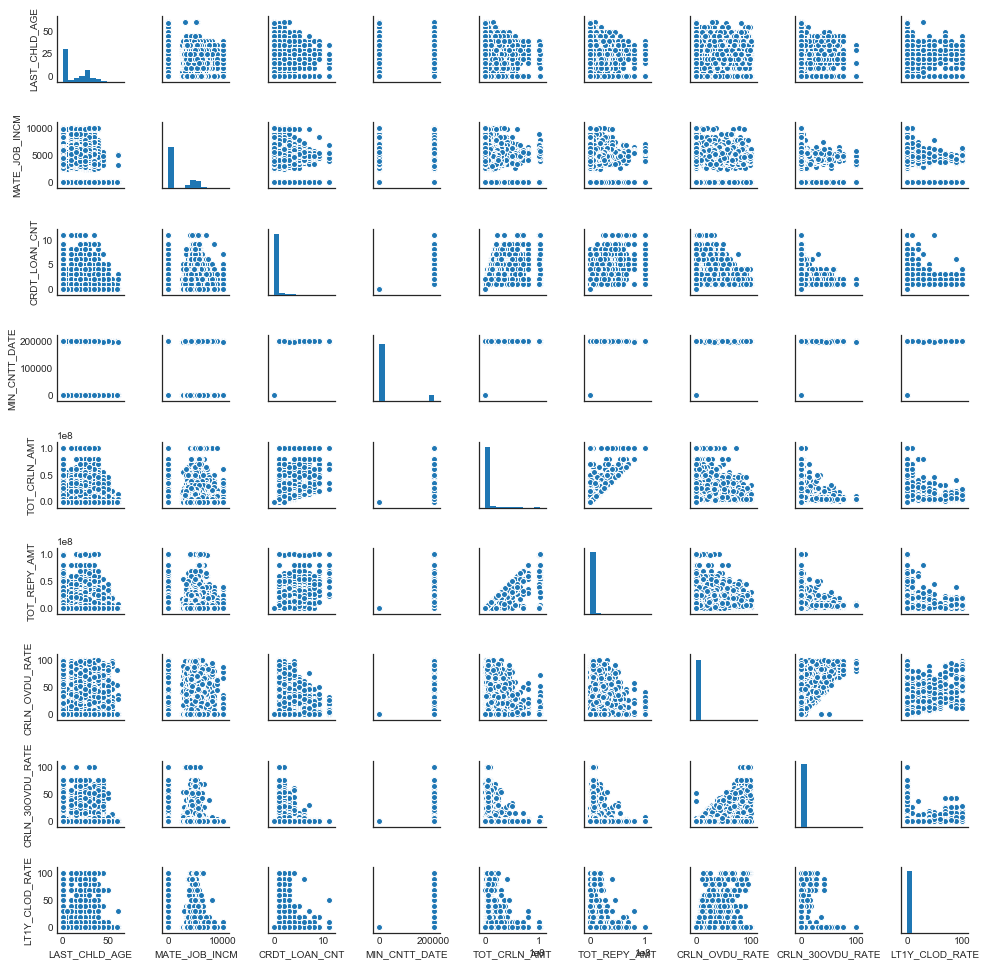

In [31]:
scatter_plot(20,30)

In [152]:
bar_chart('LAST_CHLD_AGE','막내 자녀 나이')

In [153]:
bar_chart('MATE_OCCP_NAME_G' , '배우자직업')

In [157]:
bar_chart('MIN_CNTT_DATE','최초대출날짜(한화생명에서 실행된 최초의 신용대출의 년월)')

#### 'MIN_CNTT_DATE'의 대부분의 데이터가 0 !
    - 대부분 한화생명에서 신용대출한 이력이 없는 사람들
    - 한화에서 신용대출을 한적이 있는지 0,1 로 나누어야 하는가..?

In [173]:
train_X.loc[train_X['MIN_CNTT_DATE']==0].count()  

CUST_ID              90366
BNK_LNIF_CNT         90366
CPT_LNIF_CNT         90366
SPART_LNIF_CNT       90366
ECT_LNIF_CNT         90366
TOT_LNIF_AMT         90366
TOT_CLIF_AMT         90366
BNK_LNIF_AMT         90366
CPT_LNIF_AMT         90366
CRDT_OCCR_MDIF       90366
SPTCT_OCCR_MDIF      90366
CRDT_CARD_CNT        90366
CTCD_OCCR_MDIF       90366
CB_GUIF_CNT          90366
CB_GUIF_AMT          90366
OCCP_NAME_G          90366
CUST_JOB_INCM        90366
HSHD_INFR_INCM       90366
ACTL_FMLY_NUM        90366
CUST_FMLY_NUM        90366
LAST_CHLD_AGE        90366
MATE_OCCP_NAME_G     90366
MATE_JOB_INCM        90366
CRDT_LOAN_CNT        90366
MIN_CNTT_DATE        90366
TOT_CRLN_AMT         90366
TOT_REPY_AMT         90366
CRLN_OVDU_RATE       90366
CRLN_30OVDU_RATE     90366
LT1Y_CLOD_RATE       90366
                     ...  
GDINS_MON_PREM       90366
SVINS_MON_PREM       90366
FMLY_GDINS_MNPREM    90366
FMLY_SVINS_MNPREM    90366
MAX_MON_PREM         90366
TOT_PREM             90366
F

### 4) list_x [30:40] 

1) 양적변수
    
    -'PREM_OVDU_RATE' (보험료연체율),
    -'AVG_STLN_RATE'  (평균약대율),
    -'STLN_REMN_AMT'  (약관대출가능잔액),
    -'LT1Y_STLN_AMT'  (최근1년약대금액),
    -'LT1Y_SLOD_RATE' (최근1년약대연체율),
    -'GDINS_MON_PREM' (非연금저축상품월납입보험료),
    -'SVINS_MON_PREM' (연금저축상품월납입보험료)

2) 질적변수

    -'STRT_CRDT_GRAD' (최초신용등급)   
    -'LTST_CRDT_GRAD' (최근신용등급)
    -'LT1Y_PEOD_RATE' (최근1년보험료연체율)

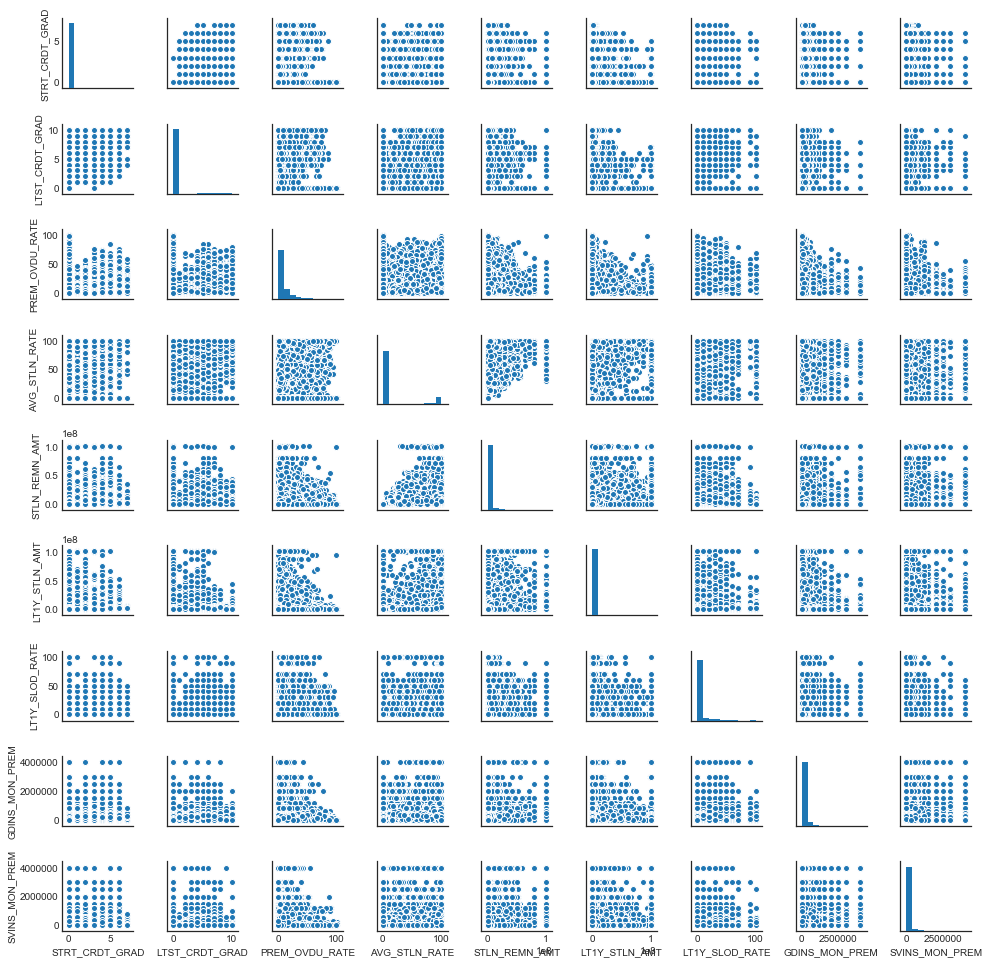

In [32]:
scatter_plot(30,40)

In [174]:
# 0(등급없음)
bar_chart('STRT_CRDT_GRAD','최초신용등급')

In [175]:
# 0(등급없음)
bar_chart('LTST_CRDT_GRAD','최근신용등급')

In [176]:
#(최근1년보험료연체율)
train_X.LT1Y_PEOD_RATE.value_counts() 

0       73274
10미만    12462
20미만     7197
30미만     3021
40미만     1758
50미만      848
90미만      704
60미만      684
90이상      285
Name: LT1Y_PEOD_RATE, dtype: int64

In [177]:
bar_chart('LT1Y_PEOD_RATE', '최근1년보험료연체율' )

### 5) list_x [40:50] 

1) 양적변수
    
    -'FMLY_GDINS_MNPREM',(非가구연금저축상품월납입보험료)
    -'FMLY_SVINS_MNPREM',(가구非연금저축상품월납입보험료)
    -'MAX_MON_PREM',     (최대월납입보험료)
    -'TOT_PREM',         (기납입보험료)
    -'FMLY_TOT_PREM',    (가구기납입보험료)
    -'CNTT_LAMT_CNT',    (실효해지건수)
    -'LT1Y_CTLT_CNT',    (최근1년 실효해지건수)
    -'AUTR_FAIL_MCNT',   (자동이체실패월수)
    -'FYCM_PAID_AMT',    (가구총지급보험금액)
    -'FMLY_CLAM_CNT'     (가구총보험금청구건수)

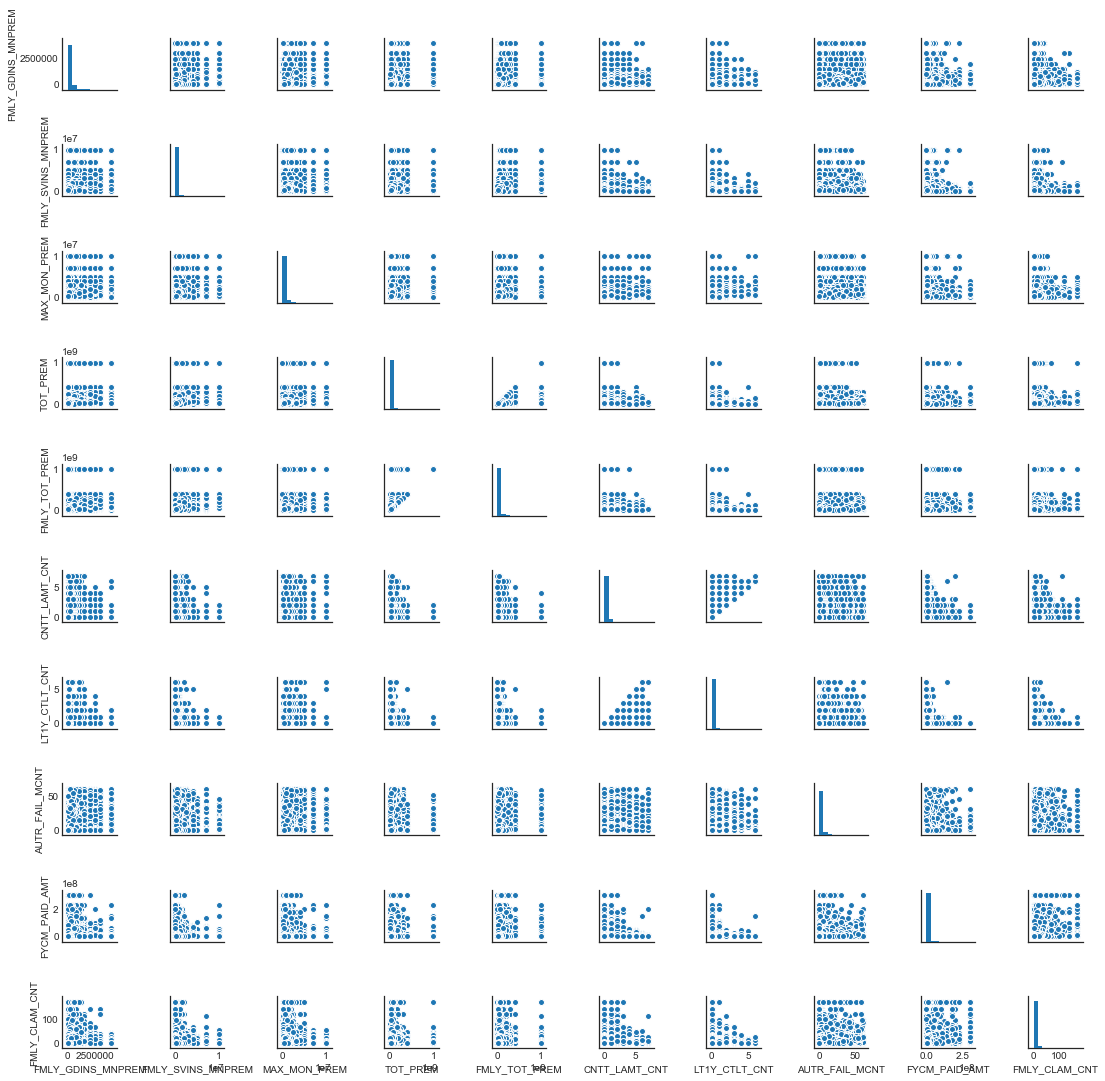

In [178]:
scatter_plot(40,50)

### 6) list_x [50:60] 

1) 양적변수

    -'FMLY_PLPY_CNT', (가구만기완납경험횟수)
    -'AVG_CALL_TIME', (월통화시간_분)
    -'AVG_CALL_FREQ', (월통화빈도)
    -'TEL_MBSP_GRAD', (멤버쉽등급)
    -'ARPU',          (가입자매출_원)
    -'MON_TLFE_AMT',  (납부요금_원)
    -'MOBL_FATY_PRC'  (단말기가격_원)

2) 질적변수


    -'AGE',           (연령)  ** str 처리 되어있음 int 형으로 바꿔야 함
    -'SEX',           (성별)
    -'TEL_MBSP_GRAD', (멤버쉽등급)
    -'CBPT_MBSP_YN',  (결합상품가입여부)

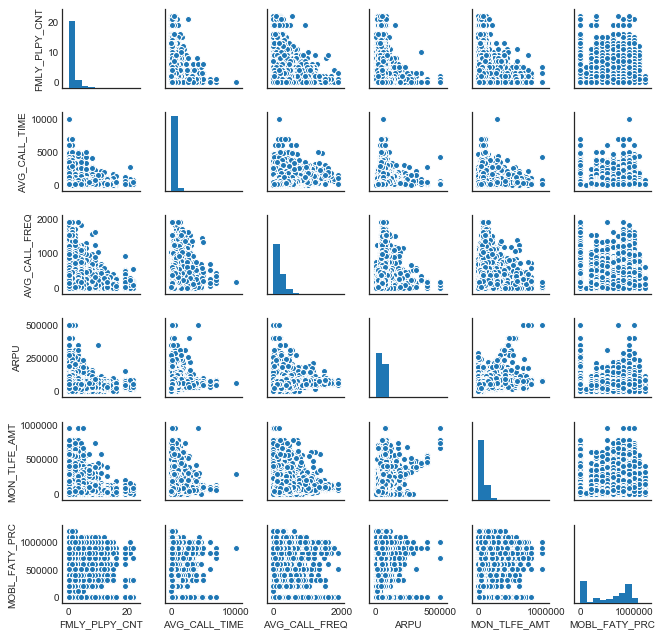

In [38]:
scatter_plot(50,60)

## ** 데이터 고객들의 연령은 20대 이상

In [179]:
len(train_X['AGE'])

100233

In [180]:
bar_chart('AGE' , '연령')  # str -> int 변환 필요 & * (비식별) 처리...?

In [181]:
# 1 : 남자  , 2: 여자
bar_chart('SEX' , '성별')  # str -> int 변환 필요

In [182]:
#VIP / Gold / Silver / 일반
bar_chart('TEL_MBSP_GRAD' , '멤버쉽등급')

In [183]:
bar_chart('CBPT_MBSP_YN','결합상품 가입 여부') # 라벨 인코딩으로 전처리 

### 6) list_x [60:68] 

1) 양적변수

    -'TEL_CNTT_QTR', (가입년월_분기)
    -'NUM_DAY_SUSP', (정지일수)
    -'CRMM_OVDU_AMT',(당월연체금액_원)
    -'TLFE_UNPD_CNT',(납부일미준수횟수)
    -'LT1Y_MXOD_AMT',(년간최대연체금액_원)
    -'MOBL_PRIN'     (남은할부금_원)
  
2) 질적변수

    -'PAYM_METD',    (납부방법)
    -'LINE_STUS',    (회선상태)

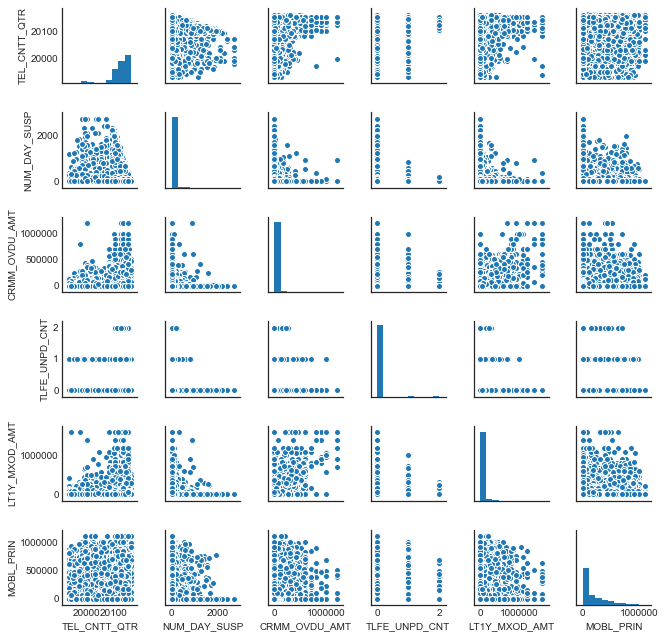

In [52]:
scatter_plot(60,68)

In [51]:
bar_chart('PAYM_METD','납부방법')

In [52]:
#S(정지), U(사용)
bar_chart('LINE_STUS','회선상태')

## 2.질적변수 변환하기

### (1) label encoding  -  LightGBM에서 사용 가능

** 질적변수
   
    -'OCCP_NAME_G'(직업)
    -'MATE_OCCP_NAME_G'(배우자직업),
    -'MIN_CNTT_DATE'(최초대출날짜),
    -'STRT_CRDT_GRAD' (최초신용등급)  
    -'LTST_CRDT_GRAD' (최근신용등급)
    -'LT1Y_PEOD_RATE' (최근1년보험료연체율)
    -'AGE',           (연령)  ** str 처리 되어있음 int 형으로 바꿔야 함
    -'SEX',           (성별)
    -'TEL_MBSP_GRAD', (멤버쉽등급)
    -'CBPT_MBSP_YN',  (결합상품가입여부)
    -'PAYM_METD',    (납부방법)
    -'LINE_STUS',    (회선상태)

* 질적 변수 중 라벨 인코딩이 필요한 변수리스트

    -'OCCP_NAME_G'(직업),'MATE_OCCP_NAME_G'(배우자직업)  ==> 같은 라벨로 인코딩 되어야 함
    -'LT1Y_PEOD_RATE' (최근1년보험료연체율)
    -'SEX',           (성별)
    -'TEL_MBSP_GRAD', (멤버쉽등급)
    -'CBPT_MBSP_YN',  (결합상품가입여부)
    -'PAYM_METD',    (납부방법)
    -'LINE_STUS',    (회선상태)

* 질적 변수 중 str --> int 형으로 바꿔야 하는 변수

    -'AGE',           (연령)  ** str 처리 되어있음 int 형으로 바꿔야 함

### 1) * --> '비식별'로 text 바꾸기 (굳이 안해도 되는 작업)
    - 'OCCP_NAME_G'(직업),'MATE_OCCP_NAME_G'(배우자직업)

In [194]:
train_X['OCCP_NAME_G'] = train_X['OCCP_NAME_G'].apply(lambda x: '비식별' if x == '*' else x)

In [195]:
train_X['MATE_OCCP_NAME_G'] = train_X['MATE_OCCP_NAME_G'].apply(lambda x: '비식별' if x == '*' else x)

In [201]:
train_X.OCCP_NAME_G.tail(10)

100223     주부
100224    전문직
100225    사무직
100226    비식별
100227    자영업
100228    자영업
100229    운전직
100230    자영업
100231    사무직
100232    사무직
Name: OCCP_NAME_G, dtype: object

### 2)str -> int 형으로 값 바꾸기
   - 'AGE',           (연령)  

In [202]:
train_X['AGE'] = train_X['AGE'].apply(lambda x : 0 if x == '*' else int(x))

In [203]:
train_X['AGE'].head()

0    50
1    50
2    60
3    35
4    45
Name: AGE, dtype: int64

In [204]:
Y_target = train['TARGET']

In [206]:
X_train_label = train_X.copy()

라벨 인코딩 해야할 질적 변수 리스트

In [207]:
cate_list = ['LT1Y_PEOD_RATE','SEX','TEL_MBSP_GRAD','CBPT_MBSP_YN',\
             'PAYM_METD','LINE_STUS','OCCP_NAME_G','MATE_OCCP_NAME_G']

In [208]:
from sklearn.preprocessing import LabelEncoder

In [209]:
def lbl_enc(var_x):
    lbl_enc = LabelEncoder()
    lbl_enc.fit(X_train_label[var_x])
    var_x_lbl = var_x+'_LABEL'
    X_train_label[var_x_lbl] = lbl_enc.transform(X_train_label[var_x])

In [210]:
for i in cate_list:
    print (i)
    lbl_enc(i)

LT1Y_PEOD_RATE
SEX
TEL_MBSP_GRAD
CBPT_MBSP_YN
PAYM_METD
LINE_STUS
OCCP_NAME_G
MATE_OCCP_NAME_G


In [211]:
X_train_label.columns

Index(['CUST_ID', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CRDT_CARD_CNT',
       'CTCD_OCCR_MDIF', 'CB_GUIF_CNT', 'CB_GUIF_AMT', 'OCCP_NAME_G',
       'CUST_JOB_INCM', 'HSHD_INFR_INCM', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM',
       'LAST_CHLD_AGE', 'MATE_OCCP_NAME_G', 'MATE_JOB_INCM', 'CRDT_LOAN_CNT',
       'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'CRLN_OVDU_RATE',
       'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE', 'STRT_CRDT_GRAD',
       'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE', 'AVG_STLN_RATE',
       'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE', 'GDINS_MON_PREM',
       'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 'FMLY_SVINS_MNPREM',
       'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'CNTT_LAMT_CNT',
       'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 'FMLY_CLAM_CNT',
       'FMLY_PLPY_CNT', 'AGE', 'SEX', 'AVG_CALL_TIME', '

In [212]:
X_train_label.tail()

CUST_ID  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT  \
100228   102248             1             0               2             2   
100229   102249             2             0               0             0   
100230   102250             1             0               0             0   
100231   102251             0             0               1             1   
100232   102252             1             0               0             0   

        TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228         75001         15001         57001             0   
100229         54001          9001         54001             0   
100230         27001         27001         27001             0   
100231         57001             0             0             0   
100232         18001         18001         18001             0   

        CRDT_OCCR_MDIF           ...            LINE_STUS  MOBL_PRIN  \
100228              37           ...                    U          0   
100229              85           ...                    U     180000   
100230               1           ...                    U          0   
100231               1           ...                    U     540000   
100232              49           ...                    U     180000   

        LT1Y_PEOD_RATE_LABEL  SEX_LABEL  TEL_MBSP_GRAD_LABEL  \
100228                     1          2                    2   
100229                     0          2                    3   
100230                     0          1                    1   
100231                     0          1                    3   
100232                     0          2                    0   

       CBPT_MBSP_YN_LABEL  PAYM_METD_LABEL  LINE_STUS_LABEL  \
100228                  0                4                1   
100229                  1                2                1   
100230                  0                3                1   
100231                  0                3                1   
100232                  0                2                1   

        OCCP_NAME_G_LABEL  MATE_OCCP_NAME_G_LABEL  
100228                 14                      14  
100229                 13                       1  
100230                 14                      13  
100231                 11                       0  
100232                 11                      11  

[5 rows x 76 columns]

In [214]:
X_train_label[['MATE_OCCP_NAME_G','MATE_OCCP_NAME_G_LABEL','OCCP_NAME_G','OCCP_NAME_G_LABEL']].tail()

MATE_OCCP_NAME_G  MATE_OCCP_NAME_G_LABEL OCCP_NAME_G  OCCP_NAME_G_LABEL
100228              자영업                      14         자영업                 14
100229         1차산업 종사자                       1         운전직                 13
100230              운전직                      13         자영업                 14
100231                0                       0         사무직                 11
100232              사무직                      11         사무직                 11

### 3)label encoding을 한 데이터 프레임 label encoding 안된 카테고리 컬럼 삭제

In [215]:
for i in cate_list:
    print (i)
    del X_train_label[i]

LT1Y_PEOD_RATE
SEX
TEL_MBSP_GRAD
CBPT_MBSP_YN
PAYM_METD
LINE_STUS
OCCP_NAME_G
MATE_OCCP_NAME_G


In [217]:
X_train_label.columns

Index(['CUST_ID', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CRDT_CARD_CNT',
       'CTCD_OCCR_MDIF', 'CB_GUIF_CNT', 'CB_GUIF_AMT', 'CUST_JOB_INCM',
       'HSHD_INFR_INCM', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM', 'LAST_CHLD_AGE',
       'MATE_JOB_INCM', 'CRDT_LOAN_CNT', 'MIN_CNTT_DATE', 'TOT_CRLN_AMT',
       'TOT_REPY_AMT', 'CRLN_OVDU_RATE', 'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE',
       'STRT_CRDT_GRAD', 'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'AVG_STLN_RATE',
       'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE', 'GDINS_MON_PREM',
       'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 'FMLY_SVINS_MNPREM',
       'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'CNTT_LAMT_CNT',
       'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 'FMLY_CLAM_CNT',
       'FMLY_PLPY_CNT', 'AGE', 'AVG_CALL_TIME', 'AVG_CALL_FREQ', 'ARPU',
       'MON_TLFE_AMT', 'MOBL_FATY_PRC', 'TE

### (2) onehot encoding  -  random forest , xgboost 사용

In [264]:
X_train_onehot= pd.get_dummies(train_X)

In [265]:
X_train_onehot.columns

Index(['CUST_ID', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF',
       ...
       'TEL_MBSP_GRAD_W', 'CBPT_MBSP_YN_N', 'CBPT_MBSP_YN_Y', 'PAYM_METD_0',
       'PAYM_METD_G', 'PAYM_METD_K', 'PAYM_METD_O', 'PAYM_METD_R',
       'LINE_STUS_S', 'LINE_STUS_U'],
      dtype='object', length=122)

In [267]:
X_train_onehot.tail()

CUST_ID  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT  \
100228   102248             1             0               2             2   
100229   102249             2             0               0             0   
100230   102250             1             0               0             0   
100231   102251             0             0               1             1   
100232   102252             1             0               0             0   

        TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
100228         75001         15001         57001             0   
100229         54001          9001         54001             0   
100230         27001         27001         27001             0   
100231         57001             0             0             0   
100232         18001         18001         18001             0   

        CRDT_OCCR_MDIF     ...       TEL_MBSP_GRAD_W  CBPT_MBSP_YN_N  \
100228              37     ...                     0               1   
100229              85     ...                     0               0   
100230               1     ...                     0               1   
100231               1     ...                     0               1   
100232              49     ...                     0               1   

        CBPT_MBSP_YN_Y  PAYM_METD_0  PAYM_METD_G  PAYM_METD_K  PAYM_METD_O  \
100228               0            0            0            0            0   
100229               1            0            0            1            0   
100230               0            0            0            0            1   
100231               0            0            0            0            1   
100232               0            0            0            1            0   

        PAYM_METD_R  LINE_STUS_S  LINE_STUS_U  
100228            1            0            1  
100229            0            0            1  
100230            0            0            1  
100231            0            0            1  
100232            0            0            1  

[5 rows x 122 columns]

# 3. 스케일링

- scale(X): 표준정상분포 Standard Normal Gaussian 기본 스케일
- robust_scale(X): median, interquartile range 사용. outlier 영향 최소화
- minmax_scale(X): 최대/최소값 사용
- maxabs_scale(X): 최대절대값 사용

In [268]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [269]:
min_max_scaler = minmax_scale(X_train_label , feature_range=(0,1))
scaler = scale(X_train_label)

In [270]:
min_max_scaler = pd.DataFrame(min_max_scaler)
min_max_scaler.head()

0    1    2         3         4         5         6         7   \
0  0.000000  0.2  0.0  0.000000  0.000000  0.009054  0.009055  0.009535   
1  0.000010  0.2  0.0  0.000000  0.000000  0.024145  0.000000  0.025425   
2  0.000020  0.0  0.2  0.428571  0.333333  0.015091  0.009055  0.000000   
3  0.000029  0.0  0.4  0.571429  0.333333  0.006036  0.003019  0.000000   
4  0.000039  0.8  0.0  0.000000  0.000000  0.021127  0.015092  0.022247   

        8         9     ...          58        59    60   61   62   63    64  \
0  0.00000  0.008264    ...     0.00000  0.527273  0.25  0.5  0.0  0.0  0.75   
1  0.00000  0.000000    ...     0.00000  0.081818  0.00  0.5  0.0  0.0  0.75   
2  0.00997  0.008264    ...     0.00000  0.109091  0.00  1.0  0.0  1.0  0.75   
3  0.00997  0.008264    ...     0.39375  0.290909  0.00  0.5  0.0  0.0  0.25   
4  0.00000  0.008264    ...     0.05625  0.372727  0.00  0.5  1.0  1.0  0.25   

    65        66        67  
0  1.0  0.294118  0.941176  
1  1.0  0.823529  0.941176  
2  1.0  0.941176  0.117647  
3  0.0  1.000000  0.000000  
4  1.0  0.294118  0.941176  

[5 rows x 68 columns]

In [272]:
scaler =  pd.DataFrame(scale)
scaler.head()

0         1         2         3         4         5         6   \
0 -1.731650  0.217651 -0.597403 -0.836987 -0.675509 -0.588512 -0.291335   
1 -1.731616  0.217651 -0.597403 -0.836987 -0.675509 -0.470875 -0.399690   
2 -1.731582 -1.144305  0.595320  1.797728  2.150968 -0.541457 -0.291335   
3 -1.731548 -1.144305  1.788044  2.675967  2.150968 -0.612039 -0.363564   
4 -1.731514  4.303518 -0.597403 -0.836987 -0.675509 -0.494402 -0.219107   

         7         8         9     ...           58        59        60  \
0 -0.445368 -0.321119 -0.587052    ...    -0.270279  1.658046  1.117592   
1 -0.288724 -0.321119 -0.621423    ...    -0.270279 -0.426365 -0.460560   
2 -0.539365 -0.090898 -0.587052    ...    -0.270279 -0.298748 -0.460560   
3 -0.539365 -0.090898 -0.587052    ...     8.602418  0.552032 -0.460560   
4 -0.320053 -0.321119 -0.587052    ...     0.997249  0.934883 -0.460560   

         61        62        63        64       65        66        67  
0 -1.063828 -0.983395 -0.858288  0.607361  0.13919 -1.101440  1.671375  
1 -1.063828 -0.983395 -0.858288  0.607361  0.13919  0.600846  1.671375  
2  0.908623 -0.983395  1.165110  0.607361  0.13919  0.979132 -0.539830  
3 -1.063828 -0.983395 -0.858288 -2.018429 -7.18441  1.168274 -0.855717  
4 -1.063828  1.517411  1.165110 -2.018429  0.13919 -1.101440  1.671375  

[5 rows x 68 columns]

In [273]:
robust_scaler = robust_scale(X_train_label)
robust_scaler =  pd.DataFrame(robust_scaler)
robust_scaler.head()

0    1    2    3    4         5         6         7    8     9   \
0 -0.999687  0.0  0.0 -1.0  0.0 -0.322581  0.000000  0.000000  0.0  0.00   
1 -0.999668  0.0  0.0 -1.0  0.0 -0.161290 -0.300023  0.238091  0.0 -0.04   
2 -0.999648 -1.0  1.0  2.0  2.0 -0.258065  0.000000 -0.142871  1.0  0.00   
3 -0.999628 -1.0  2.0  3.0  2.0 -0.354839 -0.199993 -0.142871  1.0  0.00   
4 -0.999609  3.0  0.0 -1.0  0.0 -0.193548  0.199993  0.190473  0.0  0.00   

     ...           58       59   60   61        62   63   64   65        66  \
0    ...          0.0  1.50000  2.0 -1.0 -0.666667  0.0  0.0  0.0 -0.545455   
1    ...          0.0 -0.03125  0.0 -1.0 -0.666667  0.0  0.0  0.0  0.272727   
2    ...          0.0  0.06250  0.0  0.0 -0.666667  1.0  0.0  0.0  0.454545   
3    ...     630000.0  0.68750  0.0 -1.0 -0.666667  0.0 -2.0 -1.0  0.545455   
4    ...      90000.0  0.96875  0.0 -1.0  0.666667  1.0 -2.0  0.0 -0.545455   

         67  
0  1.272727  
1  1.272727  
2  0.000000  
3 -0.181818  
4  1.272727  

[5 rows x 68 columns]

In [274]:
robust_scaler_dummy = robust_scale(X_train_onehot)
robust_scaler_dummy =  pd.DataFrame(robust_scaler_dummy)
robust_scaler_dummy.head()

0    1    2    3    4         5         6         7    8     9   ...   \
0 -0.999687  0.0  0.0 -1.0  0.0 -0.322581  0.000000  0.000000  0.0  0.00 ...    
1 -0.999668  0.0  0.0 -1.0  0.0 -0.161290 -0.300023  0.238091  0.0 -0.04 ...    
2 -0.999648 -1.0  1.0  2.0  2.0 -0.258065  0.000000 -0.142871  1.0  0.00 ...    
3 -0.999628 -1.0  2.0  3.0  2.0 -0.354839 -0.199993 -0.142871  1.0  0.00 ...    
4 -0.999609  3.0  0.0 -1.0  0.0 -0.193548  0.199993  0.190473  0.0  0.00 ...    

   112  113  114  115  116  117  118  119  120  121  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0 -1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0 -1.0  0.0  1.0 -1.0  
4  1.0 -1.0  1.0  0.0  1.0  0.0 -1.0  0.0  0.0  0.0  

[5 rows x 122 columns]

# 4. Model Selection